In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [28]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


In [3]:
# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
        
    #Print error message and move to the next city
    except:
        print("City not found,Skipping...")
        

City Name: gaogou, City ID: 1810553
City Name: karlshamn, City ID: 2701727
City Name: constantia, City ID: 680963
City Name: tolanaro, City ID: 1055433
City Name: saipan, City ID: 4041552
City not found,Skipping...
City Name: holualoa, City ID: 5856050
City Name: edinburgh of the seven seas, City ID: 3370726
City Name: grytviken, City ID: 3426466
City Name: port augusta, City ID: 2063056
City Name: olonkinbyen, City ID: 7535941
City Name: port-aux-francais, City ID: 1546102
City Name: praia da vitoria, City ID: 3372760
City Name: invercargill, City ID: 2189529
City Name: waitangi, City ID: 4032804
City Name: bamboo flat, City ID: 1277476
City Name: isafjordur, City ID: 3415667
City Name: tughyl, City ID: 1520025
City Name: bilibino, City ID: 2126682
City Name: chonchi, City ID: 3894871
City Name: kone, City ID: 2140691
City Name: adamstown, City ID: 4030723
City Name: luderitz, City ID: 3355672
City Name: kavaratti, City ID: 1267390
City Name: west island, City ID: 7304591
City Name: h

City Name: enewetak, City ID: 7306511
City Name: kodiak, City ID: 5866583
City Name: essaouira, City ID: 2549263
City Name: tobelo, City ID: 1623651
City Name: argostolion, City ID: 264668
City Name: abepura, City ID: 2082727
City Name: benghazi, City ID: 88319
City Name: keflavik, City ID: 3415496
City Name: higuera de zaragoza, City ID: 4004850
City not found,Skipping...
City Name: port douglas, City ID: 2152681
City Name: visby, City ID: 2662689
City Name: belmonte, City ID: 3470137
City Name: al qusayr, City ID: 173322
City Name: dudinka, City ID: 1507116
City Name: noumea, City ID: 2139521
City Name: angaur state, City ID: 4038282
City Name: princeville, City ID: 6113466
City Name: sandnessjoen, City ID: 3140301
City Name: turpan, City ID: 1529114
City Name: pechora, City ID: 511794
City Name: quellon, City ID: 3874943
City Name: motueka, City ID: 2184361
City Name: san andres, City ID: 3670218
City Name: khandyga, City ID: 2022773
City Name: tual, City ID: 1623197
City Name: arip

City Name: ketchikan, City ID: 5554428
City Name: srivardhan, City ID: 1255619
City Name: funafuti, City ID: 2110394
City Name: reggane, City ID: 2483761
City Name: montrose, City ID: 5431716
City Name: belogorsk, City ID: 2026895
City Name: santa maria, City ID: 3450083
City Name: delijan, City ID: 136399
City Name: acapulco de juarez, City ID: 3533462
City Name: flin flon, City ID: 5954718
City Name: kokopo, City ID: 2093685
City not found,Skipping...
City Name: gizo, City ID: 2108857
City Name: prado, City ID: 3452483
City not found,Skipping...
City Name: ankazobe, City ID: 1072849
City Name: kaa-khem, City ID: 1505187
City Name: la'ie, City ID: 5850027
City Name: darnah, City ID: 87205
City Name: taulaga, City ID: 5881150
City Name: menzelinsk, City ID: 527529
City Name: san-pedro, City ID: 2282006
City Name: capitan bado, City ID: 3439189
City Name: khorinsk, City ID: 2022304
City Name: luganville, City ID: 2136150
City Name: kirakira, City ID: 2178753
City Name: as sulayyil, City

In [4]:
# Convert the cities weather data into a Pandas DataFrame
cities_df = pd.DataFrame({"City ID": city_id_list, "City" : city_name_list, "Country": country_list,
                         "Lat": lat_list, "Lng": lng_list, "Temperature" : temp_list,
                         "Humidity" : humidity_list, "Clouds": clouds_list, "Wind Speed": wind_speed_list})

# Show record count
cities_df.count()

City ID        549
City           549
Country        549
Lat            549
Lng            549
Temperature    549
Humidity       549
Clouds         549
Wind Speed     549
dtype: int64

In [5]:
#Display Sample Data
cities_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,1810553,Gaogou,CN,34.0175,119.1886,73.44,95,98,3.91
1,2701727,Karlshamn,SE,56.1706,14.8619,57.69,84,13,8.19
2,680963,Constanța,RO,44.1833,28.6500,74.08,60,17,10.18
3,1055433,Tôlanaro,MG,-25.0319,46.9987,69.87,94,75,11.50
4,4041552,Saipan,MP,15.1355,145.7010,81.64,100,40,4.61


In [6]:
#Export to .csv file
cities_df.to_csv("Output/city_weather.csv", index = False, header = True)

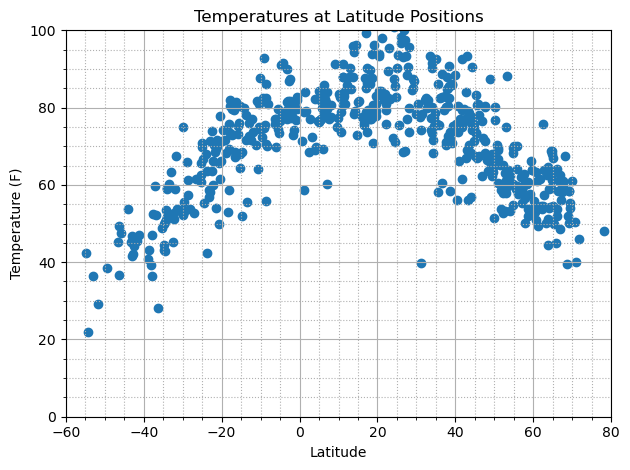

In [7]:
# CREATE THE SCATTER PLOTS REQUESTED
#Latitude Vs. Temperature

# Build scatter plot for latitude vs. temperature
x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

# Save the figure
plt.savefig("Images/lat_temp.png")

# Show plot
plt.show()

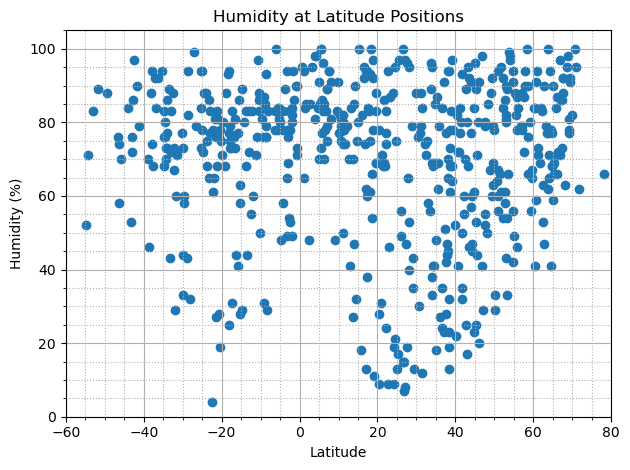

In [8]:
#Latitude Vs. Humidity

# Build the scatter plots for latitude vs. humidity
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

# Save the figure
plt.savefig("Images/lat_humid.png")

# Show plot
plt.show()

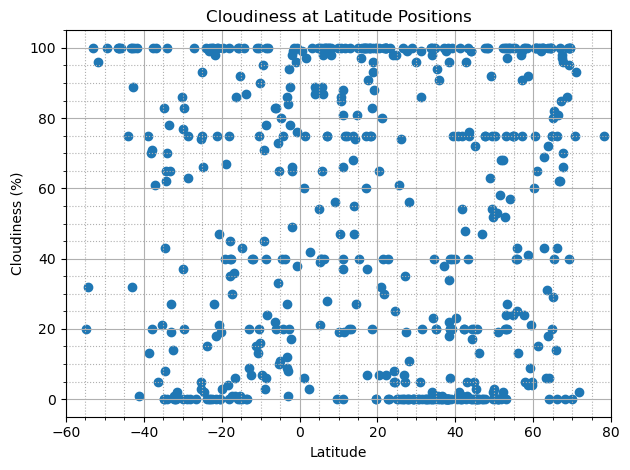

In [9]:
#Latitude Vs. Cloudiness

# Build the scatter plots for latitude vs. humidity
x_values = cities_df["Lat"]
y_values = cities_df["Clouds"]

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

# Save the figure
plt.savefig("Images/lat_cloud.png")

# Show plot
plt.show()

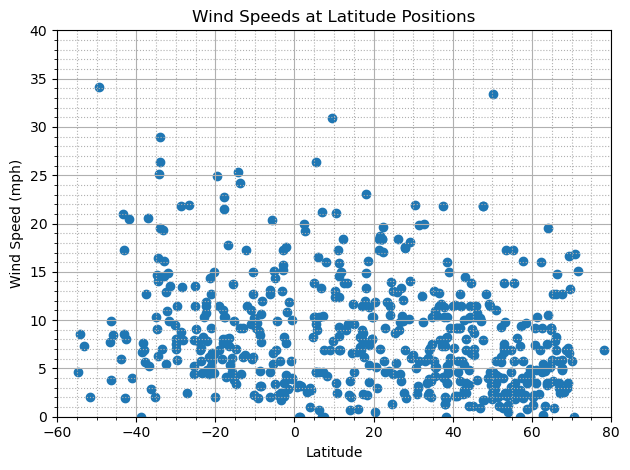

In [10]:
#Latitude Vs. Wind Speed Plot

# Build the scatter plots for latitude vs. humidity
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.title('Wind Speeds at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

# Save the figure
plt.savefig("Images/lat_wind.png")

# Show plot
plt.show()

In [30]:
#REQUIREMENT 2: COMPUTE LINEAR REGRESSION FOR EACH RELATIONSHIP

#Create a function to create Linear Regression plots

def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_values)
    regress_values = x_values * slope + intercept
    
    line_eq = "y= "+ str(round(slope,2)) + "x + " + str(round(intercept,2))
    correlation = st.pearsonr(x_values, y_values)
    
    print(f"r-squared: {rvalue**2}")
    print(f"Correlation : {correlation}")
    print(f"Line : {line_eq}")
   
    return regress_values, line_eq

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
mask = cities_df['Lat'] >0

northern_hemisphere = cities_df[mask]

# Display sample data
northern_hemisphere.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,1810553,Gaogou,CN,34.0175,119.1886,73.44,95,98,3.91
1,2701727,Karlshamn,SE,56.1706,14.8619,57.69,84,13,8.19
2,680963,Constanța,RO,44.1833,28.6500,74.08,60,17,10.18
4,4041552,Saipan,MP,15.1355,145.7010,81.64,100,40,4.61
5,5856050,Holualoa,US,19.6228,-155.9522,79.00,69,0,8.05


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
mask = cities_df['Lat'] < 0

southern_hemisphere = cities_df[mask]

# Display sample data
southern_hemisphere.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
3,1055433,Tôlanaro,MG,-25.0319,46.9987,69.87,94,75,11.50
6,3370726,Edinburgh of the Seven Seas,SH,-37.0676,-12.3116,59.74,92,61,20.58
7,3426466,Grytviken,GS,-54.2811,-36.5092,21.92,71,32,8.55
8,2063056,Port Augusta,AU,-32.5000,137.7667,45.09,88,14,5.41
10,1546102,Port-aux-Français,TF,-49.3500,70.2167,38.55,88,100,34.11


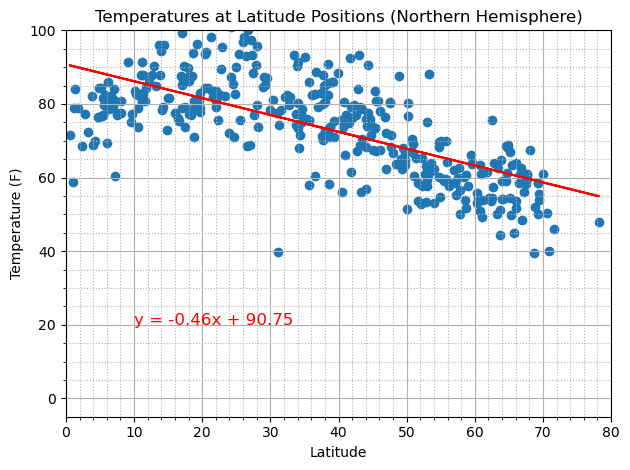

<Figure size 640x480 with 0 Axes>

In [32]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temperature"]



(slope, intercept, rvalue, pvalue, strderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values,y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_lat_temp_regression.png")

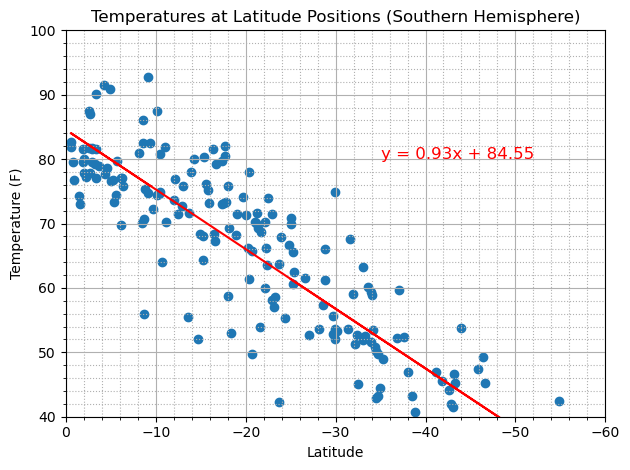

<Figure size 640x480 with 0 Axes>

In [33]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(40, 100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/sh_lat_temp_regression.png")

In [35]:
# Discussion about the linear Relationship:

#Answer

Max Temp vs. Latitude Linear Regression

Both the Northern and Southern Hemispheres show the same inverse relationship between latitude
and temperature. As you get closer to the equator (latitude 0) the higher the temperature gets. 
There is a strong correlation for both hemishperes, but the Northern Hemisphere seems to have an almost one to one relationship.

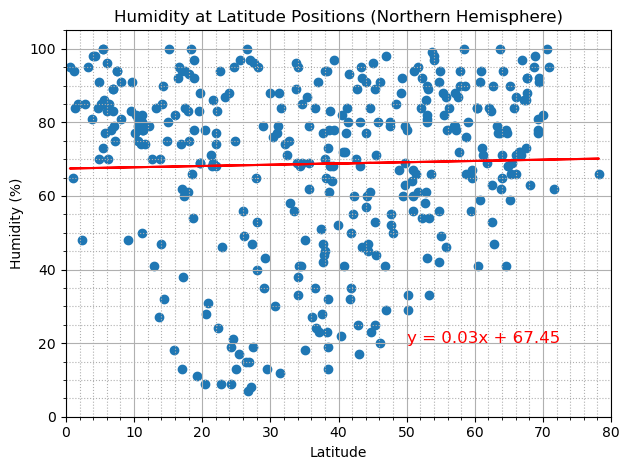

<Figure size 640x480 with 0 Axes>

In [36]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_lat_humid_regression.png")

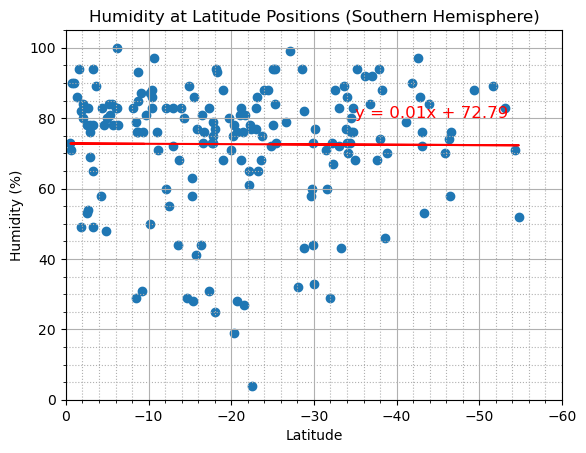

<Figure size 640x480 with 0 Axes>

In [38]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("Images/sh_lat_humid_regression.png")

In [ ]:
# Discussion about the linear relationship:Humidity % vs. Latitude Linear Regression

#Answer

There does not seem to be a very strong correlation between humidity and latitude. 
However, there does seem to be a slight positive correlation in the Northern Hemisphere 
and a slight negative correlation in the Southern Hemisphere; meaning in the Northern Hemisphere 
as you get further away from the equator (latitude 0) humidity increases, and in the Southern Hemisphere it decreases 
as you get further away from the equator.

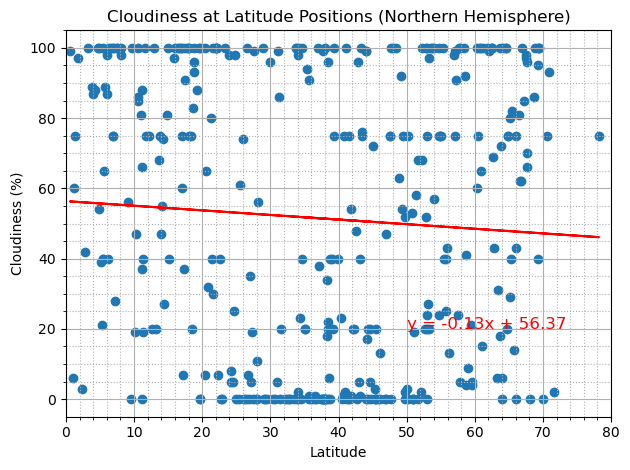

<Figure size 640x480 with 0 Axes>

In [39]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_lat_clouds_regression.png")

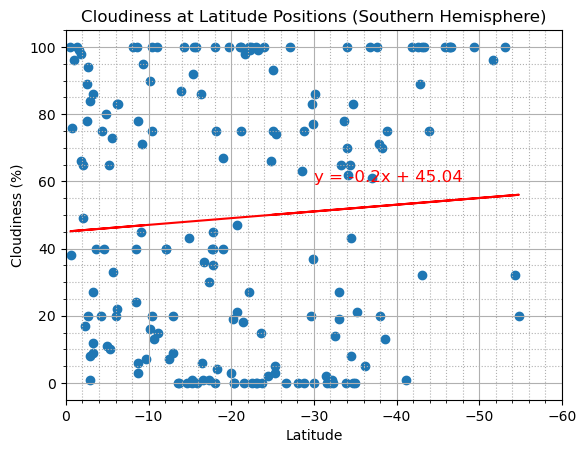

<Figure size 640x480 with 0 Axes>

In [40]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("Images/sh_lat_clouds_regression.png")

In [ ]:
# Discussion about the linear relationship: Cloudiness vs. Latitude Linear Regression

#Answer

There does not seem to be much correlation between cloudiness and latitude when you look at the plots.
However, when the linear regression is performed, you can see that there is a slight positive correlation 
in the Northern Hemisphere but a strong negative correlation in the Southern Hemisphere.
In the Southern Hemisphere it shows that the further you are from the equator (latitude 0) the less cloudy it is.

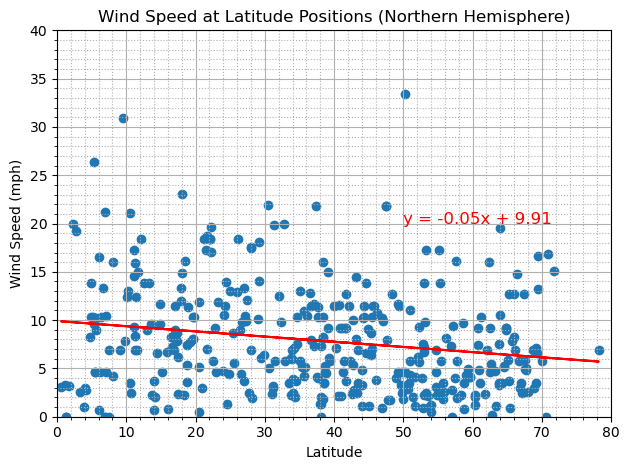

<Figure size 640x480 with 0 Axes>

In [41]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_lat_wind_regression.png")

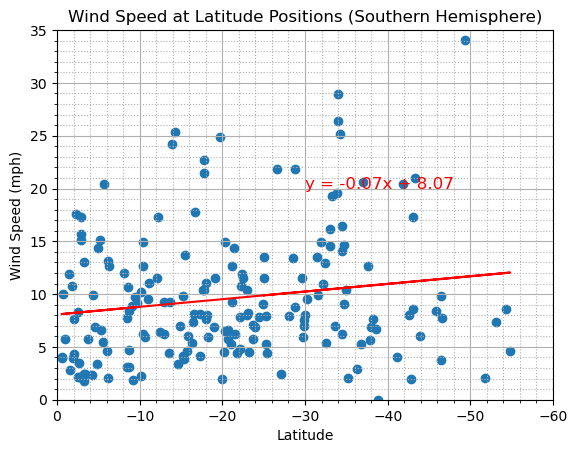

<Figure size 640x480 with 0 Axes>

In [42]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("Images/sh_lat_wind_regression.png")

In [ ]:
# Discussion about the linear relationship: Wind Speed vs. Latitude Linear Regression

There does seem to be a pretty strong correlation between wind sped and latitude when you look at the plots. 
However, the linear regresion shows a much lower correlation than it appears. There is still a definite correlation 
in both hemispheres, in that the further you are from the equator (latitude 0) the higher the wind speeds are, 
but the slope of the regression line is much shallower than I was expecting looking at the plots.